### Using Different Moves

https://emcee.readthedocs.io/en/stable/tutorials/moves/

Text(0.5, 0, 'x')

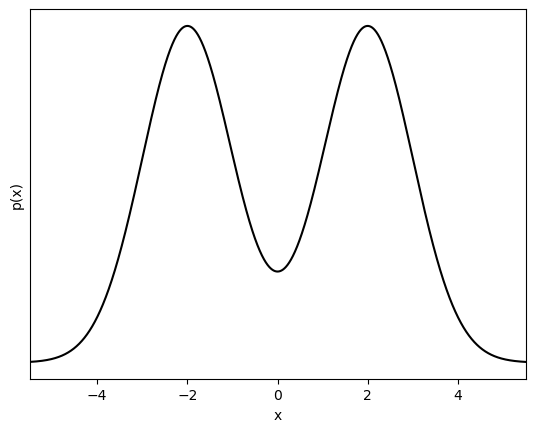

In [16]:
# Example where we sample from a mixture of two Gaussians in 1D

import numpy as np
import matplotlib.pyplot as plt


def logprob(x):
    return np.sum(
        np.logaddexp(
            -0.5 * (x - 2) ** 2,
            -0.5 * (x + 2) ** 2,
        )
        - 0.5 * np.log(2 * np.pi)
        - np.log(2)
    )


x = np.linspace(-5.5, 5.5, 5000)
plt.plot(x, np.exp(list(map(logprob, x))), "k")
plt.yticks([])
plt.xlim(-5.5, 5.5)
plt.ylabel("p(x)")
plt.xlabel("x")

Autocorrelation time: 40.03 steps


Text(0, 0.5, 'x')

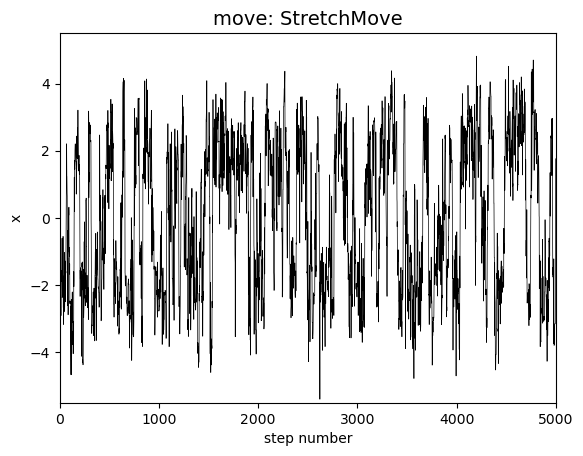

In [18]:
# Sample using emcee and the moves.StretchMove

import emcee

np.random.seed(589403)

init = np.random.randn(32, 1)
nwalkers, ndim = init.shape

sampler0 = emcee.EnsembleSampler(nwalkers, ndim, logprob)
sampler0.run_mcmc(init, 5000)

print(
    "Autocorrelation time: {0:.2f} steps".format(
        sampler0.get_autocorr_time()[0]
    )
)

plt.plot(sampler0.get_chain()[:, 0, 0], "k", lw=0.5)
plt.xlim(0, 5000)
plt.ylim(-5.5, 5.5)
plt.title("move: StretchMove", fontsize=14)
plt.xlabel("step number")
plt.ylabel("x")

Autocorrelation time: 5.77 steps


Text(0, 0.5, 'x')

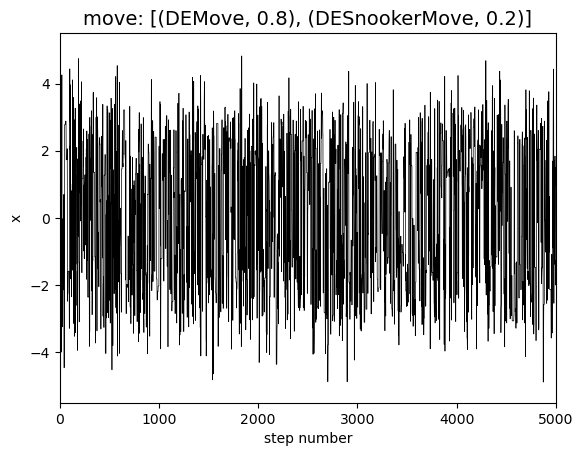

In [19]:
# Try with a mixture of moves.DEMove and moves.DESnookerMove

np.random.seed(93284)

sampler = emcee.EnsembleSampler(
    nwalkers,
    ndim,
    logprob,
    moves=[
        (emcee.moves.DEMove(), 0.8),
        (emcee.moves.DESnookerMove(), 0.2),
    ],
)
sampler.run_mcmc(init, 5000)

print(
    "Autocorrelation time: {0:.2f} steps".format(
        sampler.get_autocorr_time()[0]
    )
)

plt.plot(sampler.get_chain()[:, 0, 0], "k", lw=0.5)
plt.xlim(0, 5000)
plt.ylim(-5.5, 5.5)
plt.title("move: [(DEMove, 0.8), (DESnookerMove, 0.2)]", fontsize=14)
plt.xlabel("step number")
plt.ylabel("x")